In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(v, u, I):
    return (0.7 * (v + 60) * (v + 40) - u + I) / 100
def g(v, u):
    return 0.03 *(-2 * (v + 60) - u)

In [3]:
def mEuler(n, h, I):
    
    # Define variables
    nspikes = 0
    shape = int(n / h + 1)
    v = np.empty(shape)
    v[0] = -70
    u = -70
    
    # Update u and v
    for i in range(len(v) - 1):
        # If spike:
        if v[i] > 35:
            nspikes = nspikes + 1
            v[i+1] = -50
            u = u + 100
        else:
            vw = v[i] + h * f(v[i], u, I)
            v[i+1] = v[i] + 0.5 * h * (f(v[i], u, I) + f(vw, u + h, I))

            uw = u + h * g(v[i], u)
            u = u + 0.5 * h * (g(v[i], u) + g(v[i] + h, uw))
        
    return v, nspikes

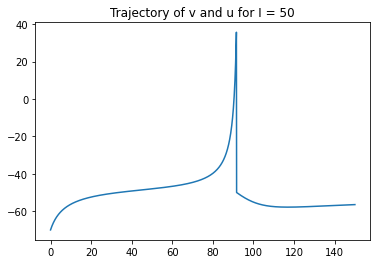

In [4]:
# Meta parameters
h = 0.1
n = 150
I = 50

# Run the model
v, _ = mEuler(n, h, I)

# Plot firing pattern of a single spike
t = np.arange(0, int(n / h) + 1) * h
plt.title("Trajectory of v and u for I = 50")
plt.plot(t, v)
plt.show()

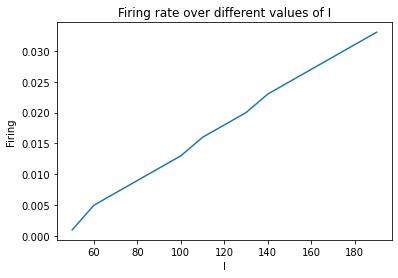

In [5]:
# Meta parameters
h = 0.1
n = 1000
nss = []

# Determine firing rate over multiple values of I
for I in np.arange(50, 200, 10):
    # Get number of spikes for this 
    v, nspikes = mEuler(n, h, I)
    
    # Save in array
    nss.append(nspikes / n)

# Plot firing rate
plt.title("Firing rate over different values of I")
plt.plot(np.arange(50, 200, 10), nss)
plt.xlabel("I")
plt.ylabel("Firing ")
plt.show()

In [76]:
# Number of neurons
N = 10
dt = 0.1
t = 500
I = 60


# Make connection matrix
cm = np.random.randint(0, 2, (N, N))
np.fill_diagonal(cm, 0)

# Get data
def mmEuler(N, t, dt, cm, I):
    
    # Define variables
    shape = int(t / dt + 1)
    v = np.empty((N, shape))
    u = np.empty(N)
    u.fill(-70)
    v[:,0] = -70
    nspikes = []  # hardcoded number of spikes
    
    # Update u and v
    for n in range(N):
        spikes = []
        for i in range(v.shape[1] - 1):
            # If spike:
            if v[n, i] > 35:
                spikes.append(i)
                v[n, i+1] = -50
                u[n] = u[n] + 100
                v[:,i] = v[:,i] + cm[n] * 20
            else:
                vw = v[n, i] + dt * f(v[n, i], u[n], I)
                v[n, i+1] = v[n, i] + 0.5 * dt * (f(v[n, i], u[n], I) + f(vw, u[n] + dt, I))

                uw = u[n] + dt * g(v[n, i], u[n])
                u[n] = u[n] + 0.5 * dt * (g(v[n, i], u[n]) + g(v[n, i] + dt, uw))
        nspikes.append(spikes)
    return v, nspikes

In [77]:
# Run model
v, nspikes = mmEuler(N, t, dt, cm, I)

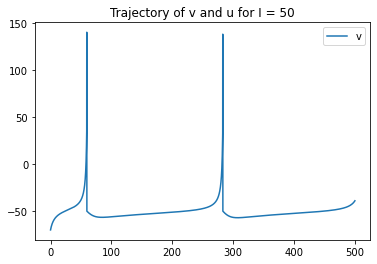

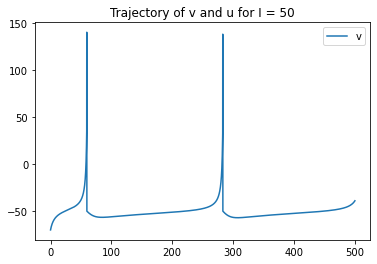

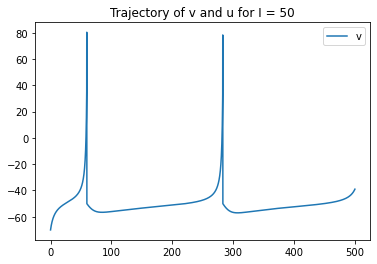

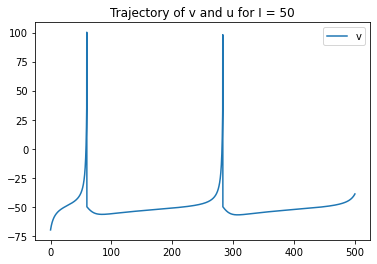

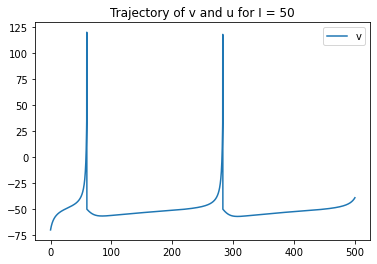

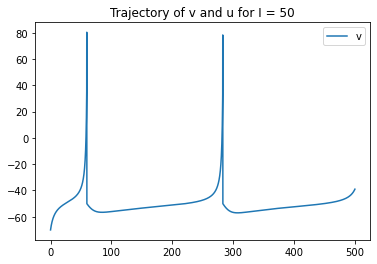

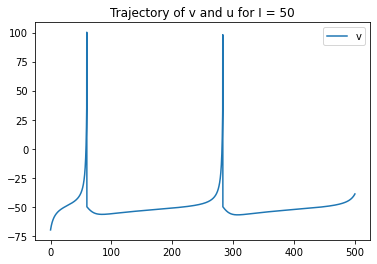

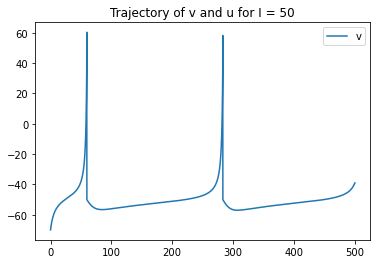

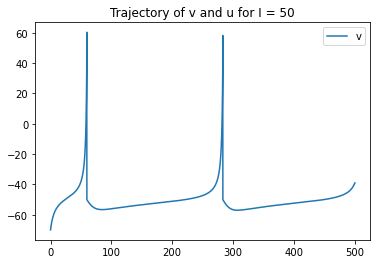

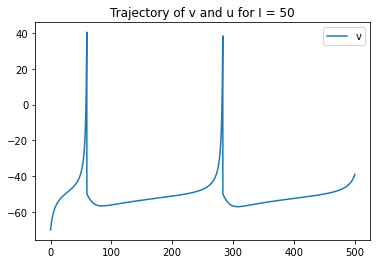

In [78]:
# Plot firing pattern of all neurons individually
for n in range(N):
    x = np.arange(0, int(t / dt) + 1) * dt
    plt.title("Trajectory of v and u for I = 50")
    plt.plot(x, v[n], label='v')
    plt.legend()
    plt.show()

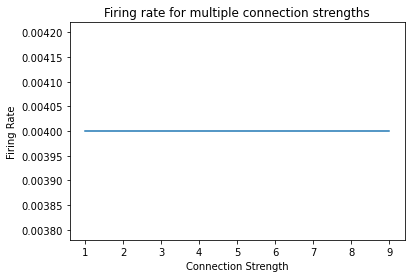

In [82]:
nss = []
for c in np.arange(1, 10):
    cm = np.random.randint(0, 2, (N, N))
    np.fill_diagonal(cm, 0)
    cm = cm * c
    
    v, nspikes = mmEuler(N, t, dt, cm, I)
    
    lengths = np.array([len(i) for i in nspikes])
    avg = np.average(lengths)
    nss.append(avg / t)

plt.plot(np.arange(1, 10), nss)
plt.title("Firing rate for multiple connection strengths")
plt.xlabel("Connection Strength")
plt.ylabel("Firing Rate")
plt.show()